In [1]:
text_car = """
a car has a brakes besides the steering wheel and clutch
the brakes of your car is jammed
i think you broke the clutch of your car
there is nothing that i can do you need to change the brakes
a broken steering wheel is a disaster
"""

dog_text = """
the dog came under the car and accidently broke its leg
dog is just an animal right it does not have a brain of its own
it was lucky the driver applied the brakes on time
or worse could have happened
"""

cat_text = """
the cat jumped over the car
this pretty little animal with its pouncing leg
almost freaked out the driver
"""

In [2]:
docs = [
    "jobs found apple company",
    "jobs was ceo of apple",
    "every company has a ceo",
    "dog is an animal and so is cat",
    "but cat is more arrogant than dog"
]

In [3]:
bows = []
for doc in docs:
    bows.append(doc.split(" "))

In [4]:
bows

[['jobs', 'found', 'apple', 'company'],
 ['jobs', 'was', 'ceo', 'of', 'apple'],
 ['every', 'company', 'has', 'a', 'ceo'],
 ['dog', 'is', 'an', 'animal', 'and', 'so', 'is', 'cat'],
 ['but', 'cat', 'is', 'more', 'arrogant', 'than', 'dog']]

In [7]:
word_set = set()
for bow in bows:
    word_set = word_set.union(set(bow))

In [8]:
word_set

{'a',
 'an',
 'and',
 'animal',
 'apple',
 'arrogant',
 'but',
 'cat',
 'ceo',
 'company',
 'dog',
 'every',
 'found',
 'has',
 'is',
 'jobs',
 'more',
 'of',
 'so',
 'than',
 'was'}

In [21]:
word_dicts = []
for i in range(0, len(docs)):
    word_dict = dict.fromkeys(word_set, 0)
    for word in bows[i]:
        word_dict[word] += 1
        
    word_dicts.append(word_dict) 

In [22]:
# word_dicts

In [28]:
import pandas as pd
doc_term_df = pd.DataFrame(word_dicts)
doc_term_df

,a,an,and,animal,apple,arrogant,but,cat,ceo,company,...,every,found,has,is,jobs,more,of,so,than,was
0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
2,1,0,0,0,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0
3,0,1,1,1,0,0,0,1,0,0,...,0,0,0,2,0,0,0,1,0,0
4,0,0,0,0,0,1,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0


In [29]:
def compute_tf(word_dict, bow):
    tf_dict = {}
    bow_count = len(bow)
    for word, count in word_dict.items():
        tf_dict[word] = count / float(bow_count)
    return tf_dict

In [30]:
tf_dicts = []
for i in range(0, len(docs)):
    tf_dicts.append(compute_tf(word_dicts[i], bows[i]))

In [33]:
# tf_dicts
tf_dicts[0]

{'cat': 0.0,
 'every': 0.0,
 'was': 0.0,
 'apple': 0.25,
 'dog': 0.0,
 'so': 0.0,
 'than': 0.0,
 'is': 0.0,
 'found': 0.25,
 'an': 0.0,
 'animal': 0.0,
 'but': 0.0,
 'ceo': 0.0,
 'more': 0.0,
 'of': 0.0,
 'company': 0.25,
 'arrogant': 0.0,
 'a': 0.0,
 'jobs': 0.25,
 'has': 0.0,
 'and': 0.0}

In [34]:
import math
def compute_idf(word_dicts):
    idf_dict = {}
    num_docs = len(docs)
    
    # Count number of documents that contain the word w
    idf_dict = dict.fromkeys(word_dicts[0].keys(), 0)
    for word_dict in word_dicts:
        for word, val in word_dict.items():
            if val > 0:
                idf_dict[word] += 1
                
    # Formulate inverse document frequency
    for word, val in idf_dict.items():
        idf_dict[word] = math.log(num_docs / float(val))
        
    return idf_dict

In [42]:
idf_dict = compute_idf(word_dicts)
idf_dict

{'cat': 0.9162907318741551,
 'every': 1.6094379124341003,
 'was': 1.6094379124341003,
 'apple': 0.9162907318741551,
 'dog': 0.9162907318741551,
 'so': 1.6094379124341003,
 'than': 1.6094379124341003,
 'is': 0.9162907318741551,
 'found': 1.6094379124341003,
 'an': 1.6094379124341003,
 'animal': 1.6094379124341003,
 'but': 1.6094379124341003,
 'ceo': 0.9162907318741551,
 'more': 1.6094379124341003,
 'of': 1.6094379124341003,
 'company': 0.9162907318741551,
 'arrogant': 1.6094379124341003,
 'a': 1.6094379124341003,
 'jobs': 0.9162907318741551,
 'has': 1.6094379124341003,
 'and': 1.6094379124341003}

In [41]:
def compute_tf_idf(tf_dict, idf_dict):
    tf_idf = {}
    for word, val in tf_dict.items():
        tf_idf[word] = val * idf_dict[word]
    return tf_idf

In [44]:
tf_idf_list = []
for i in range(0, len(docs)):
    tf_idf_list.append(compute_tf_idf(tf_dicts[i], idf_dict))

In [47]:
# tf_idf_list
tf_idf_list[0]

{'cat': 0.0,
 'every': 0.0,
 'was': 0.0,
 'apple': 0.22907268296853878,
 'dog': 0.0,
 'so': 0.0,
 'than': 0.0,
 'is': 0.0,
 'found': 0.40235947810852507,
 'an': 0.0,
 'animal': 0.0,
 'but': 0.0,
 'ceo': 0.0,
 'more': 0.0,
 'of': 0.0,
 'company': 0.22907268296853878,
 'arrogant': 0.0,
 'a': 0.0,
 'jobs': 0.22907268296853878,
 'has': 0.0,
 'and': 0.0}

In [48]:
tf_idf_df = pd.DataFrame(tf_idf_list)
tf_idf_df

,a,an,and,animal,apple,arrogant,but,cat,ceo,company,...,every,found,has,is,jobs,more,of,so,than,was
0,0.000000,0.00000,0.00000,0.00000,0.229073,0.00000,0.00000,0.000000,0.000000,0.229073,...,0.000000,0.402359,0.000000,0.000000,0.229073,0.00000,0.000000,0.00000,0.00000,0.000000
1,0.000000,0.00000,0.00000,0.00000,0.183258,0.00000,0.00000,0.000000,0.183258,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.183258,0.00000,0.321888,0.00000,0.00000,0.321888
2,0.321888,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.183258,0.183258,...,0.321888,0.000000,0.321888,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000
3,0.000000,0.20118,0.20118,0.20118,0.000000,0.00000,0.00000,0.114536,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.229073,0.000000,0.00000,0.000000,0.20118,0.00000,0.000000
4,0.000000,0.00000,0.00000,0.00000,0.000000,0.22992,0.22992,0.130899,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.130899,0.000000,0.22992,0.000000,0.00000,0.22992,0.000000


In [50]:
td_matrix_df = tf_idf_df.transpose()
td_matrix_df

,0,1,2,3,4
a,0.000000,0.000000,0.321888,0.000000,0.000000
an,0.000000,0.000000,0.000000,0.201180,0.000000
and,0.000000,0.000000,0.000000,0.201180,0.000000
animal,0.000000,0.000000,0.000000,0.201180,0.000000
apple,0.229073,0.183258,0.000000,0.000000,0.000000
arrogant,0.000000,0.000000,0.000000,0.000000,0.229920
but,0.000000,0.000000,0.000000,0.000000,0.229920
cat,0.000000,0.000000,0.000000,0.114536,0.130899
ceo,0.000000,0.183258,0.183258,0.000000,0.000000
company,0.229073,0.000000,0.183258,0.000000,0.000000


In [51]:
import numpy as np
td_matrix = td_matrix_df.values
td_matrix

array([[0.        , 0.        , 0.32188758, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.20117974, 0.        ],
       [0.        , 0.        , 0.        , 0.20117974, 0.        ],
       [0.        , 0.        , 0.        , 0.20117974, 0.        ],
       [0.22907268, 0.18325815, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.2299197 ],
       [0.        , 0.        , 0.        , 0.        , 0.2299197 ],
       [0.        , 0.        , 0.        , 0.11453634, 0.13089868],
       [0.        , 0.18325815, 0.18325815, 0.        , 0.        ],
       [0.22907268, 0.        , 0.18325815, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.11453634, 0.13089868],
       [0.        , 0.        , 0.32188758, 0.        , 0.        ],
       [0.40235948, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.32188758, 0.        , 0.        ],
       [0.        , 0.        , 0.

In [117]:
thesaurus_matrix = np.matmul(td_matrix, td_matrix.transpose())
# thesaurus_matrix

In [119]:
word_list = doc_term_df.columns.values.tolist()
word_list

['a',
 'an',
 'and',
 'animal',
 'apple',
 'arrogant',
 'but',
 'cat',
 'ceo',
 'company',
 'dog',
 'every',
 'found',
 'has',
 'is',
 'jobs',
 'more',
 'of',
 'so',
 'than',
 'was']

In [120]:
df = pd.DataFrame(thesaurus_matrix, columns = word_list,  index = word_list)
df

,a,an,and,animal,apple,arrogant,but,cat,ceo,company,...,every,found,has,is,jobs,more,of,so,than,was
a,0.103612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058989,0.058989,...,0.103612,0.000000,0.103612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
an,0.000000,0.040473,0.040473,0.040473,0.000000,0.000000,0.000000,0.023042,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.046085,0.000000,0.000000,0.000000,0.040473,0.000000,0.000000
and,0.000000,0.040473,0.040473,0.040473,0.000000,0.000000,0.000000,0.023042,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.046085,0.000000,0.000000,0.000000,0.040473,0.000000,0.000000
animal,0.000000,0.040473,0.040473,0.040473,0.000000,0.000000,0.000000,0.023042,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.046085,0.000000,0.000000,0.000000,0.040473,0.000000,0.000000
apple,0.000000,0.000000,0.000000,0.000000,0.086058,0.000000,0.000000,0.000000,0.033584,0.052474,...,0.000000,0.092170,0.000000,0.000000,0.086058,0.000000,0.058989,0.000000,0.000000,0.058989
arrogant,0.000000,0.000000,0.000000,0.000000,0.000000,0.052863,0.052863,0.030096,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.030096,0.000000,0.052863,0.000000,0.000000,0.052863,0.000000
but,0.000000,0.000000,0.000000,0.000000,0.000000,0.052863,0.052863,0.030096,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.030096,0.000000,0.052863,0.000000,0.000000,0.052863,0.000000
cat,0.000000,0.023042,0.023042,0.023042,0.000000,0.030096,0.030096,0.030253,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.043372,0.000000,0.030096,0.000000,0.023042,0.030096,0.000000
ceo,0.058989,0.000000,0.000000,0.000000,0.033584,0.000000,0.000000,0.000000,0.067167,0.033584,...,0.058989,0.000000,0.058989,0.000000,0.033584,0.000000,0.058989,0.000000,0.000000,0.058989
company,0.058989,0.000000,0.000000,0.000000,0.052474,0.000000,0.000000,0.000000,0.033584,0.086058,...,0.058989,0.092170,0.058989,0.000000,0.052474,0.000000,0.000000,0.000000,0.000000,0.000000


In [100]:
df.values[[np.arange(df.shape[0])]*2] = 0

AttributeError: 'int' object has no attribute 'values'

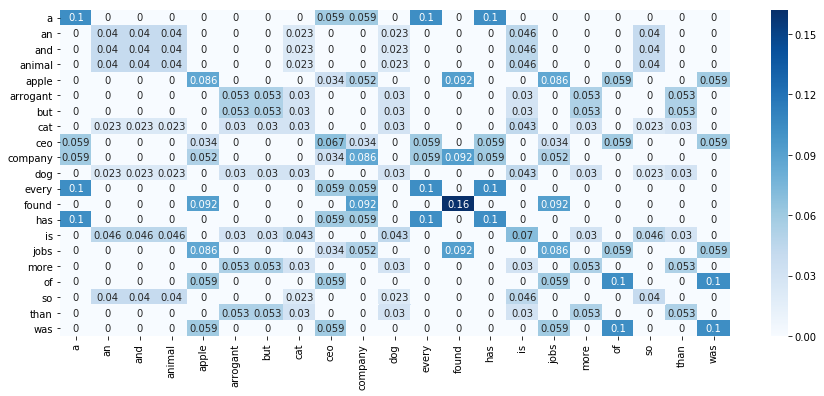

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15, 6))
plt.xticks(rotation = 90)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
sns.heatmap(df, cmap="Blues", annot=True)
plt.show()

In [231]:
unique_values = np.unique(df[df.columns.values].values)
unique_values

array([0.        , 0.02304239, 0.03009618, 0.03025304, 0.03358355,
       0.04047329, 0.04337161, 0.04608478, 0.05247429, 0.05286307,
       0.05898852, 0.0671671 , 0.06960876, 0.08605784, 0.09216957,
       0.10361162, 0.16189315])

In [232]:
thesaurus_dict = dict.fromkeys(unique_values.tolist(), [])
thesaurus_dict

{0.0: [],
 0.02304239129203522: [],
 0.03009618454469906: [],
 0.03025303689444759: [],
 0.033583548212739: [],
 0.040473287405941166: [],
 0.043371610415048764: [],
 0.04608478258407044: [],
 0.05247429408240468: [],
 0.052863069264902744: [],
 0.058988521707610174: [],
 0.067167096425478: [],
 0.0696087574562511: [],
 0.08605784229514368: [],
 0.09216956516814089: [],
 0.10361161575920941: [],
 0.16189314962376467: []}

In [237]:
thesaurus_dict = dict.fromkeys(unique_values.tolist(), [])

num_words = thesaurus_matrix.shape[0]
count = 0
for row in range(0, num_words):
    for col in range(0, num_words):
        if row == col:
            continue
            
        val = thesaurus_matrix[row][col]
        pair = [word_list[row], word_list[col]]
        pair.sort()
        
        for item in thesaurus_dict[val]:
            if item  == pair:
                continue
                
        thesaurus_dict[val].append(pair)
        
print(count)
# print(thesaurus_dict[0.0])

0


In [238]:
print(len(thesaurus_dict[0.0]))

420


In [196]:
thesaurus_dict[0.0] == thesaurus_dict[0.16189314962376467]

True

In [179]:
thesaurus_dict[0.0][0]

['a', 'an']

In [180]:
thesaurus_dict[0.16189314962376467][0]

['a', 'an']

In [186]:
lol = [[11, 22], [22, 33]]
item = [33, 44]
if item not in lol:
    lol.append(item)
    
print(lol)

[[11, 22], [22, 33], [33, 44]]


In [188]:
type(item)

list